In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#url = "https://www.blackrock.com/us/individual/products/investment-funds#!type=all&style=All&view=perfNav&pageSize=25&pageNumber=1&sortColumn=totalNetAssets&sortDirection=desc"
#df = pd.read_html(url)
#data = df[0]
#data

In [3]:
data = pd.read_excel('product-screener.xlsx')
data.head()

,Ticker,Name,SEDOL,ISIN,CUSIP,Share Class,Annual Mgt Charges,Inception Date,YTD (%),1Y (%),...,Overview,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Yields,Unnamed: 48,Distribution Rate,Distribution Rate As of,Premium Discount
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,...,Net Assets,NAV,Change ($),Change (%),NAV As Of,30 Day SEC Yield (%),Unsubsidized Yield (%),NaN,NaN,NaN
1,BMPCX,U.S. Mortgage Fund,BDZ4K52,US56166L2043,56166L204,Investor C,-,2010-12-06,4.35,4.35,...,1135782,8.84,-0.04,-0.45045,2024-01-16 00:00:00,4,3.81,-,-,-
2,BMPAX,U.S. Mortgage Fund,BDZ31K1,US56166L1052,56166L105,Investor A,-,2010-12-06,2.01,2.01,...,15118943,8.83,-0.05,-0.563063,2024-01-16 00:00:00,4.55,4.35,-,-,-
3,MSUMX,U.S. Mortgage Fund,BDZSJC4,US56166L3033,56166L303,Institutional,-,2005-07-29,-,-,...,239672935,8.85,-0.05,-0.561798,2024-01-16 00:00:00,4.98,4.79,-,-,-
4,BACAX,Energy Opportunities Fund,B067MB9,US0919373342,091937334,Investor A,5.25,2005-02-16,-2.79,-2.79,...,192231216,12.28,-0.29,-2.30708,2024-01-16 00:00:00,0,0,-,-,-


In [4]:
data.columns

Index(['Ticker', 'Name', 'SEDOL', 'ISIN', 'CUSIP', 'Share Class',
       'Annual Mgt Charges', 'Inception Date', 'YTD (%)', '1Y (%)', '3Y (%)',
       '5Y (%)', '10Y (%)', 'Incept (%)', 'As of', 'Asset Class',
       'Sub Asset Class', 'Region', 'Strategy', 'Market',
       'Gross Expense Ratio', 'performanceAtNav', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'performancePriceQuarterly', 'Unnamed: 29', 'Unnamed: 30',
       'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34',
       'NAV Quarterly', 'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38',
       'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41', 'Overview', 'Unnamed: 43',
       'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46', 'Yields', 'Unnamed: 48',
       'Distribution Rate', 'Distribution Rate As of', 'Premium Discount'],
      dtype='object')

In [5]:
data.drop(['YTD (%)', '1Y (%)', '3Y (%)', '5Y (%)', '10Y (%)', 'Incept (%)', 'As of', 'Unnamed: 26', 'performancePriceQuarterly', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'NAV Quarterly','Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39','Unnamed: 40', 'Unnamed: 41', 'Distribution Rate', 'Distribution Rate As of', 'Premium Discount'], axis=1, inplace=True)

In [6]:
data.columns

Index(['Ticker', 'Name', 'SEDOL', 'ISIN', 'CUSIP', 'Share Class',
       'Annual Mgt Charges', 'Inception Date', 'Asset Class',
       'Sub Asset Class', 'Region', 'Strategy', 'Market',
       'Gross Expense Ratio', 'performanceAtNav', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 27', 'Overview', 'Unnamed: 43',
       'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46', 'Yields', 'Unnamed: 48'],
      dtype='object')

In [7]:
data1 = data[['performanceAtNav', 'Unnamed: 22', 'Unnamed: 23','Unnamed: 24', 'Unnamed: 25', 'Unnamed: 27', 'Overview', 'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46', 'Yields', 'Unnamed: 48']].rename(columns=data.iloc[0])
data2 = data.drop(['performanceAtNav', 'Unnamed: 22', 'Unnamed: 23','Unnamed: 24', 'Unnamed: 25', 'Unnamed: 27', 'Overview', 'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46', 'Yields', 'Unnamed: 48'], axis=1)
data = pd.concat([data2, data1], axis=1)
data.drop(data.index[0], inplace=True)
data.drop(data.tail(2).index, inplace=True)
data = data.reset_index()

In [8]:
data.columns

Index(['index', 'Ticker', 'Name', 'SEDOL', 'ISIN', 'CUSIP', 'Share Class',
       'Annual Mgt Charges', 'Inception Date', 'Asset Class',
       'Sub Asset Class', 'Region', 'Strategy', 'Market',
       'Gross Expense Ratio', 'YTD (%)', '1Y (%)', '3Y (%)', '5Y (%)',
       '10Y (%)', 'Perf. as of', 'Net Assets', 'NAV', 'Change ($)',
       'Change (%)', 'NAV As Of', '30 Day SEC Yield (%)',
       'Unsubsidized Yield (%)'],
      dtype='object')

In [9]:
data.head()

,index,Ticker,Name,SEDOL,ISIN,CUSIP,Share Class,Annual Mgt Charges,Inception Date,Asset Class,...,5Y (%),10Y (%),Perf. as of,Net Assets,NAV,Change ($),Change (%),NAV As Of,30 Day SEC Yield (%),Unsubsidized Yield (%)
0,1,BMPCX,U.S. Mortgage Fund,BDZ4K52,US56166L2043,56166L204,Investor C,-,2010-12-06,Fixed Income,...,0.28,1.3,2023-12-31 00:00:00,1135782,8.84,-0.04,-0.45045,2024-01-16 00:00:00,4,3.81
1,2,BMPAX,U.S. Mortgage Fund,BDZ31K1,US56166L1052,56166L105,Investor A,-,2010-12-06,Fixed Income,...,1.03,1.91,2023-12-31 00:00:00,15118943,8.83,-0.05,-0.563063,2024-01-16 00:00:00,4.55,4.35
2,3,MSUMX,U.S. Mortgage Fund,BDZSJC4,US56166L3033,56166L303,Institutional,-,2005-07-29,Fixed Income,...,1.26,2.16,2023-12-31 00:00:00,239672935,8.85,-0.05,-0.561798,2024-01-16 00:00:00,4.98,4.79
3,4,BACAX,Energy Opportunities Fund,B067MB9,US0919373342,091937334,Investor A,5.25,2005-02-16,Equity,...,10.7,0.64,2023-12-31 00:00:00,192231216,12.28,-0.29,-2.30708,2024-01-16 00:00:00,0,0
4,5,PCBAX,Tactical Opportunities Fund,B3XR592,US0919278228,091927822,Investor A,5.25,1988-12-29,Multi Asset,...,3.31,2.94,2023-12-31 00:00:00,184470206,13.49,0.03,0.222883,2024-01-16 00:00:00,0,0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1091 entries, 0 to 1090
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   index                   1091 non-null   int64         
 1   Ticker                  1091 non-null   object        
 2   Name                    1091 non-null   object        
 3   SEDOL                   1091 non-null   object        
 4   ISIN                    1091 non-null   object        
 5   CUSIP                   1091 non-null   object        
 6   Share Class             1091 non-null   object        
 7   Annual Mgt Charges      1091 non-null   object        
 8   Inception Date          1091 non-null   datetime64[ns]
 9   Asset Class             1091 non-null   object        
 10  Sub Asset Class         1091 non-null   object        
 11  Region                  1091 non-null   object        
 12  Strategy                1091 non-null   object  

In [11]:
data.replace('-', np.nan, inplace=True)
data['Annual Mgt Charges'] = pd.to_numeric(data['Annual Mgt Charges'], errors='coerce')
data['Gross Expense Ratio'] = pd.to_numeric(data['Gross Expense Ratio'], errors='coerce')
data['YTD (%)'] = pd.to_numeric(data['YTD (%)'], errors='coerce')
data['1Y (%)'] = pd.to_numeric(data['1Y (%)'], errors='coerce')
data['3Y (%)'] = pd.to_numeric(data['3Y (%)'], errors='coerce')
data['5Y (%)'] = pd.to_numeric(data['5Y (%)'], errors='coerce')
data['10Y (%)'] = pd.to_numeric(data['10Y (%)'], errors='coerce')
data['Net Assets'] = pd.to_numeric(data['Net Assets'], errors='coerce')
data['NAV'] = pd.to_numeric(data['NAV'], errors='coerce')
data['Change ($)'] = pd.to_numeric(data['Change ($)'], errors='coerce')
data['Change (%)'] = pd.to_numeric(data['Change (%)'], errors='coerce')
data['30 Day SEC Yield (%)'] = pd.to_numeric(data['30 Day SEC Yield (%)'], errors='coerce')
data['Unsubsidized Yield (%)'] = pd.to_numeric(data['Unsubsidized Yield (%)'], errors='coerce')
data['NAV As Of'] = pd.to_datetime(data['NAV As Of'], errors='coerce')
data['Perf. as of'] = pd.to_datetime(data['Perf. as of'], errors='coerce')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1091 entries, 0 to 1090
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   index                   1091 non-null   int64         
 1   Ticker                  1091 non-null   object        
 2   Name                    1091 non-null   object        
 3   SEDOL                   468 non-null    object        
 4   ISIN                    1091 non-null   object        
 5   CUSIP                   1091 non-null   object        
 6   Share Class             1046 non-null   object        
 7   Annual Mgt Charges      96 non-null     float64       
 8   Inception Date          1091 non-null   datetime64[ns]
 9   Asset Class             1091 non-null   object        
 10  Sub Asset Class         1091 non-null   object        
 11  Region                  1091 non-null   object        
 12  Strategy                625 non-null    object  

In [13]:
data.nunique()

index                     1091
Ticker                    1091
Name                       638
SEDOL                      467
ISIN                      1091
CUSIP                     1091
Share Class                 20
Annual Mgt Charges           9
Inception Date             418
Asset Class                  8
Sub Asset Class             30
Region                       7
Strategy                    50
Market                       3
Gross Expense Ratio        259
YTD (%)                    912
1Y (%)                     913
3Y (%)                     798
5Y (%)                     720
10Y (%)                    570
Perf. as of                  5
Net Assets                1082
NAV                        894
Change ($)                 479
Change (%)                 964
NAV As Of                    2
30 Day SEC Yield (%)       624
Unsubsidized Yield (%)     238
dtype: int64

In [14]:
data.isnull().sum()

index                       0
Ticker                      0
Name                        0
SEDOL                     623
ISIN                        0
CUSIP                       0
Share Class                45
Annual Mgt Charges        995
Inception Date              0
Asset Class                 0
Sub Asset Class             0
Region                      0
Strategy                  466
Market                      0
Gross Expense Ratio         3
YTD (%)                    53
1Y (%)                     53
3Y (%)                    132
5Y (%)                    236
10Y (%)                   382
Perf. as of                 2
Net Assets                  8
NAV                         4
Change ($)                  4
Change (%)                  4
NAV As Of                   4
30 Day SEC Yield (%)      280
Unsubsidized Yield (%)    790
dtype: int64

In [15]:
(data.isnull().sum()/(len(data)))*100

index                      0.000000
Ticker                     0.000000
Name                       0.000000
SEDOL                     57.103575
ISIN                       0.000000
CUSIP                      0.000000
Share Class                4.124656
Annual Mgt Charges        91.200733
Inception Date             0.000000
Asset Class                0.000000
Sub Asset Class            0.000000
Region                     0.000000
Strategy                  42.713107
Market                     0.000000
Gross Expense Ratio        0.274977
YTD (%)                    4.857929
1Y (%)                     4.857929
3Y (%)                    12.098992
5Y (%)                    21.631531
10Y (%)                   35.013749
Perf. as of                0.183318
Net Assets                 0.733272
NAV                        0.366636
Change ($)                 0.366636
Change (%)                 0.366636
NAV As Of                  0.366636
30 Day SEC Yield (%)      25.664528
Unsubsidized Yield (%)    72

In [16]:
data.describe().T

,count,mean,min,25%,50%,75%,max,std
index,1091.0,546.0,1.0,273.5,546.0,818.5,1091.0,315.088876
Annual Mgt Charges,96.0,4.453125,0.0,4.0,5.25,5.25,5.75,1.471802
Inception Date,1091,2010-11-18 18:37:56.810265856,1973-11-08 00:00:00,2005-04-30 12:00:00,2011-05-31 00:00:00,2018-11-16 00:00:00,2024-01-05 00:00:00,NaN
Gross Expense Ratio,1088.0,0.954439,0.01,0.31,0.6,1.215,8.85,1.130427
YTD (%),1038.0,15.200042,-23.28,6.5725,12.545,18.97,1018.38,33.492566
1Y (%),1038.0,15.196911,-23.28,6.5725,12.53,18.97,1018.38,33.492252
3Y (%),959.0,2.594977,-72.56,-0.775,2.37,5.7,42.136478,6.424445
5Y (%),855.0,7.364878,-50.95,2.835,7.54,11.0692,31.130817,5.530006
10Y (%),709.0,5.438706,-30.84,2.67,4.61,7.9,24.472578,4.086463
Perf. as of,1089,2023-12-29 21:42:28.760330752,2023-07-31 00:00:00,2023-12-31 00:00:00,2023-12-31 00:00:00,2023-12-31 00:00:00,2023-12-31 00:00:00,NaN


In [17]:
data.groupby('Asset Class')['index'].count()

Asset Class
Cash                              5
Commodities & Digital Assets     14
Equity                          502
Fixed Income                    319
Hedge Fund of Funds               2
Multi Asset                     232
Private Markets                   2
Real Estate                      15
Name: index, dtype: int64

In [18]:
def get_investor_type(investor_type):
    if investor_type == 'Cash':
        return 'Any'
    elif investor_type == 'Commodities & Digital Assets':
        return 'Young'
    elif investor_type == 'Equity':
        return 'Young & Adult'
    elif investor_type == 'Fixed Income':
        return 'A dult & Elder'
    elif investor_type == 'Hedge Fund of Funds':
        return 'Adult'
    elif investor_type == 'Multi Asset':
        return 'Adult & Elder'
    elif investor_type == 'Private Markets':
        return 'Young & Adult'
    elif investor_type == 'Real Estate':
        return 'Adult & Elder'

In [19]:
data['Investor Type'] = data['Asset Class'].apply(get_investor_type)

In [20]:
data.groupby('Investor Type')['index'].count()

Investor Type
Adult              2
Adult & Elder    566
Any                5
Young             14
Young & Adult    504
Name: index, dtype: int64

In [21]:
data[['Asset Class', 'Investor Type']]

,Asset Class,Investor Type
0,Fixed Income,Adult & Elder
1,Fixed Income,Adult & Elder
2,Fixed Income,Adult & Elder
3,Equity,Young & Adult
4,Multi Asset,Adult & Elder
...,...,...
1086,Multi Asset,Adult & Elder
1087,Multi Asset,Adult & Elder
1088,Multi Asset,Adult & Elder
1089,Equity,Young & Adult


In [22]:
cat_cols = data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Ticker', 'Name', 'SEDOL', 'ISIN', 'CUSIP', 'Share Class',
       'Asset Class', 'Sub Asset Class', 'Region', 'Strategy', 'Market',
       'Investor Type'],
      dtype='object')
Numerical Variables:
['index', 'Annual Mgt Charges', 'Gross Expense Ratio', 'YTD (%)', '1Y (%)', '3Y (%)', '5Y (%)', '10Y (%)', 'Net Assets', 'NAV', 'Change ($)', 'Change (%)', '30 Day SEC Yield (%)', 'Unsubsidized Yield (%)']


index
Skew : 0.0


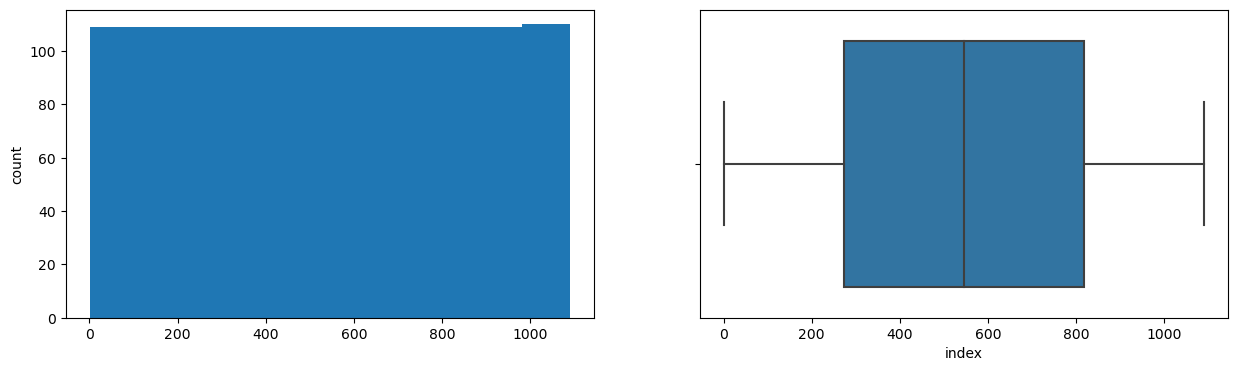

Annual Mgt Charges
Skew : -1.98


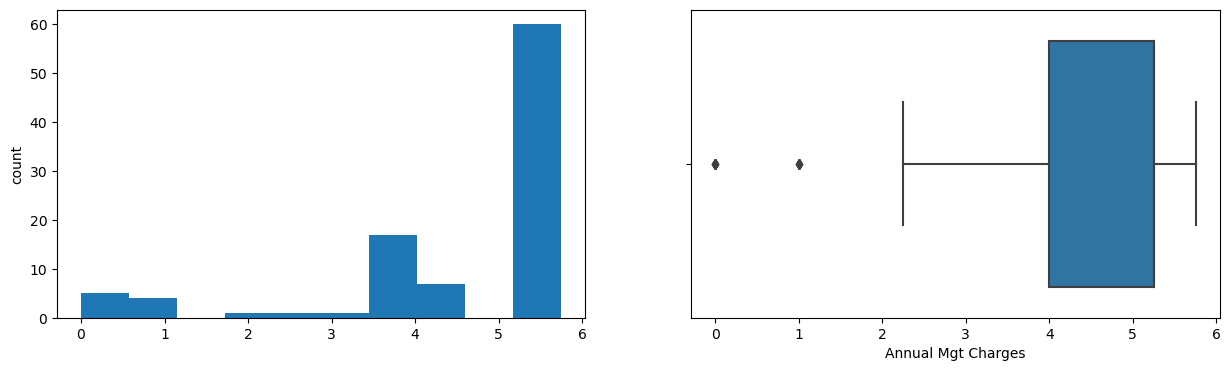

Gross Expense Ratio
Skew : 3.32


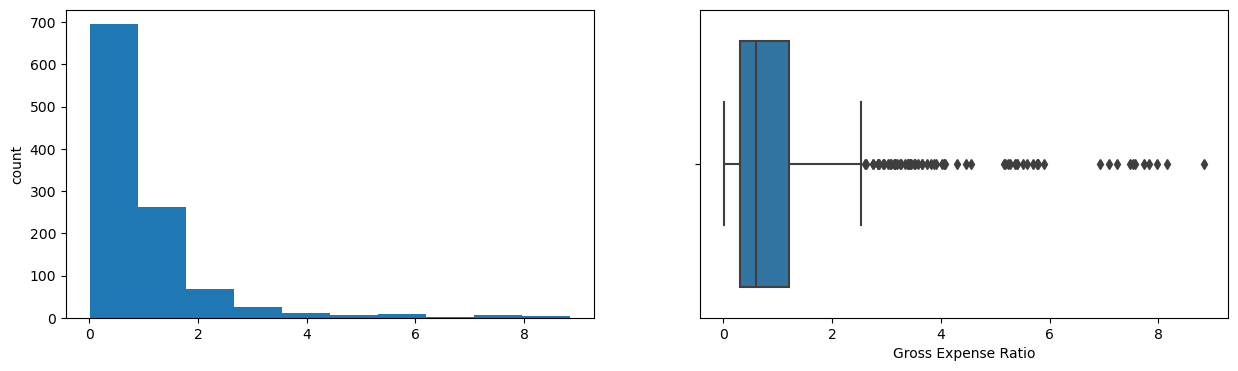

YTD (%)
Skew : 26.16


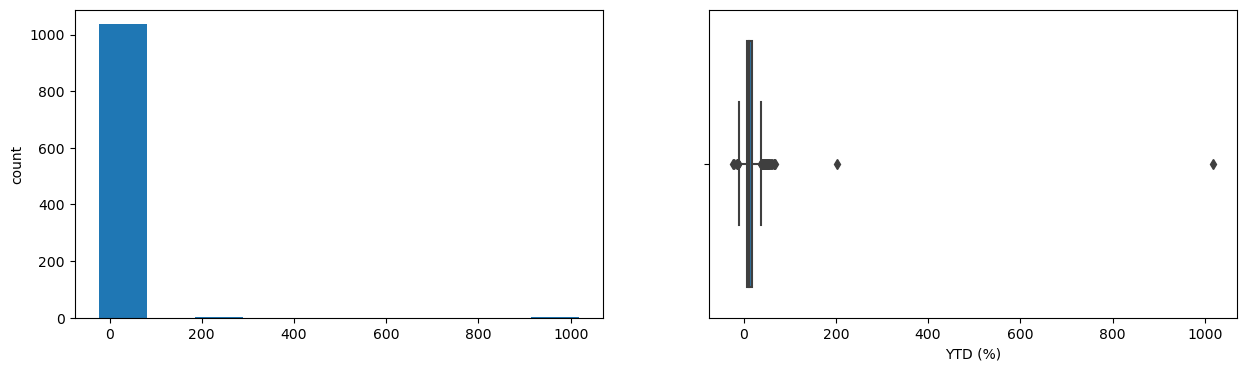

1Y (%)
Skew : 26.16


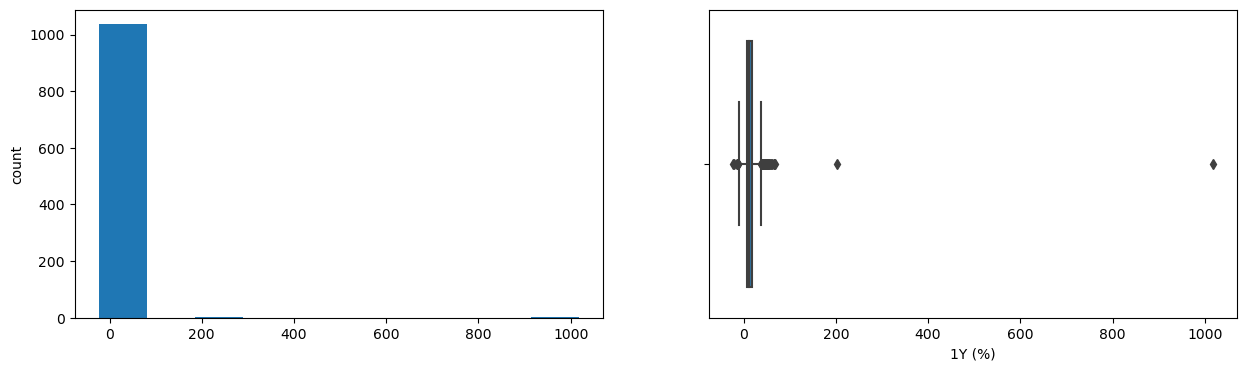

3Y (%)
Skew : -1.07


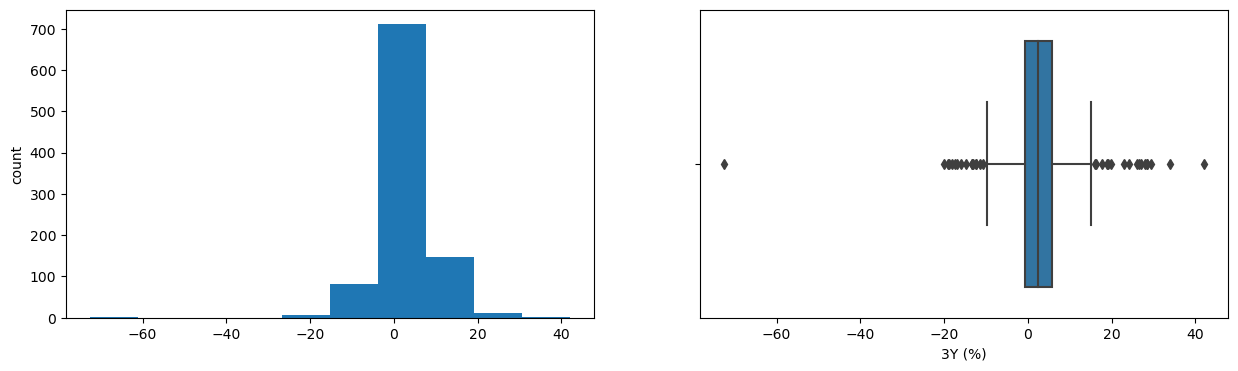

5Y (%)
Skew : -1.03


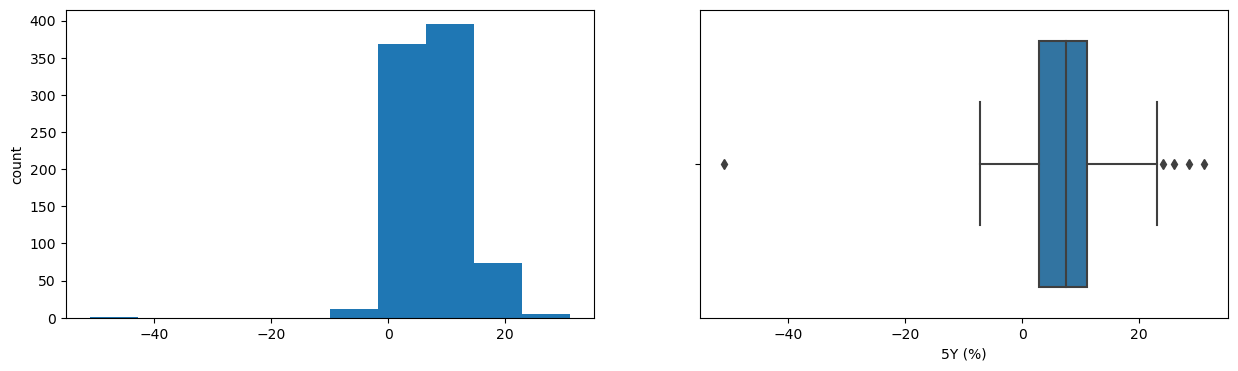

10Y (%)
Skew : -0.34


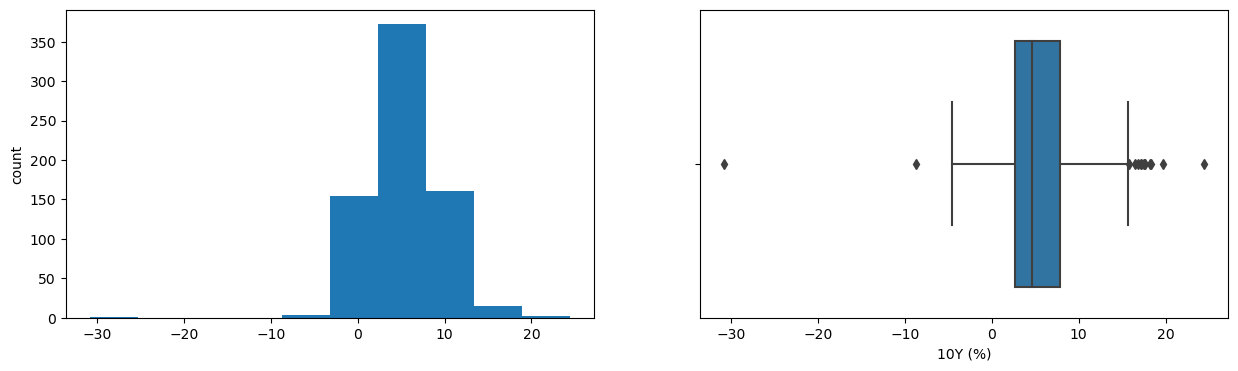

Net Assets
Skew : 19.57


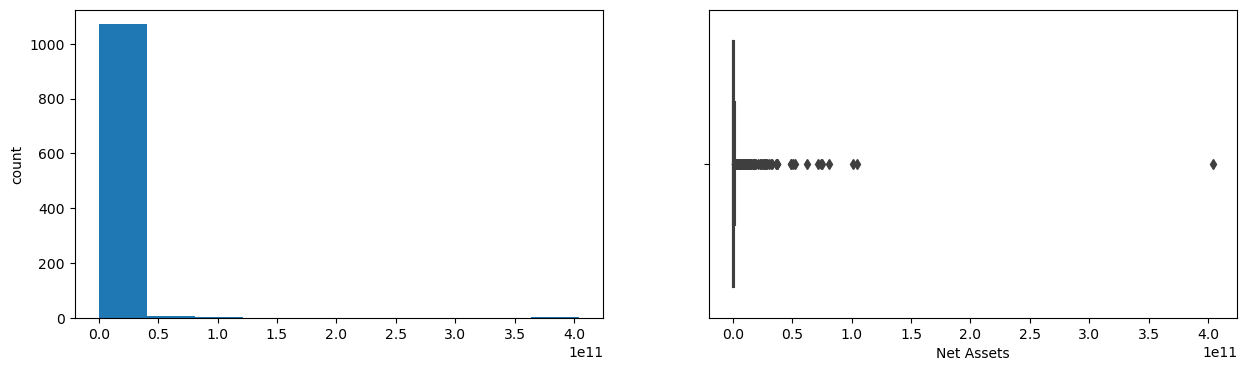

NAV
Skew : 5.94


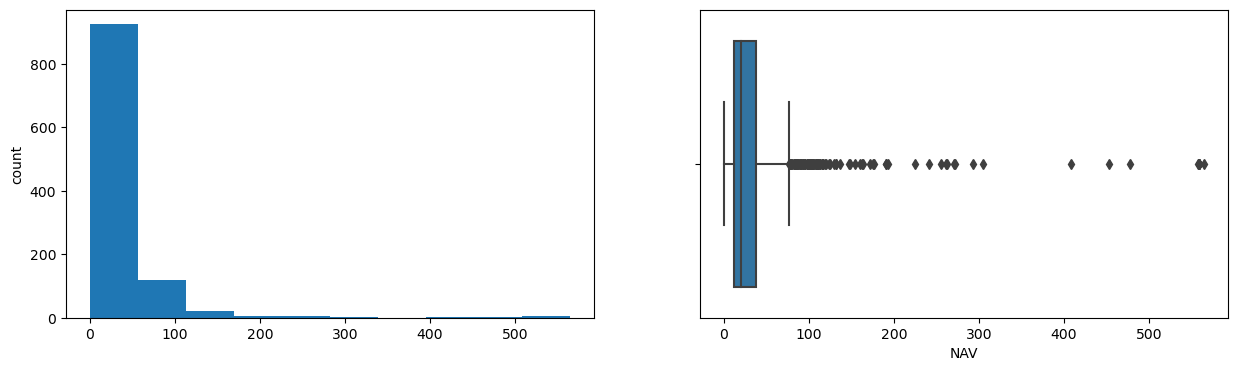

Change ($)
Skew : 3.2


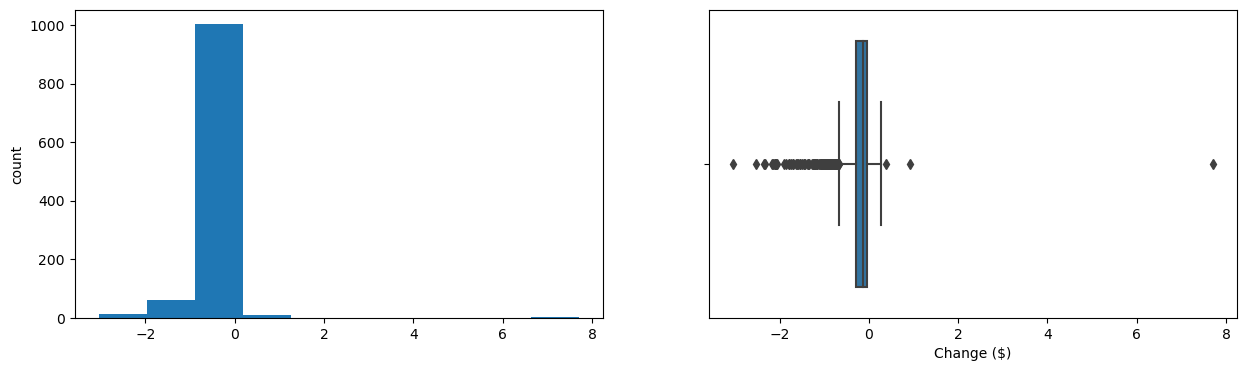

Change (%)
Skew : -1.42


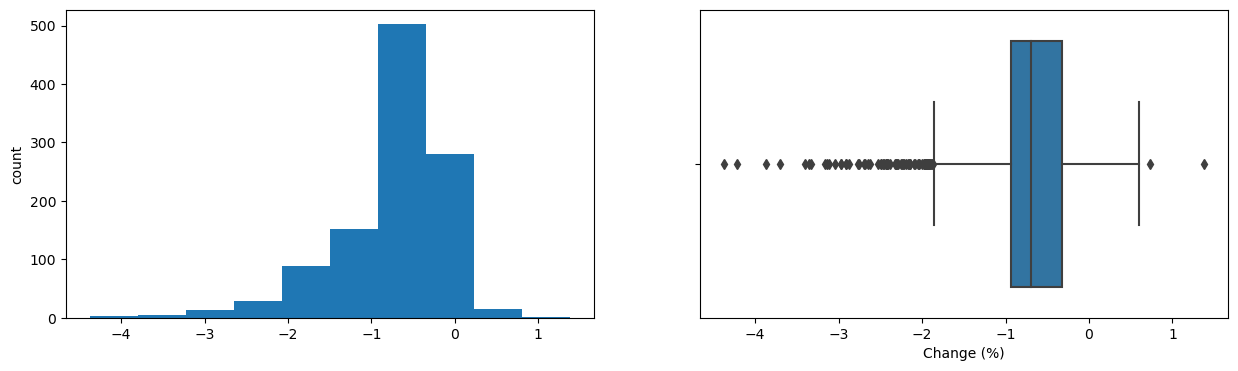

30 Day SEC Yield (%)
Skew : 0.66


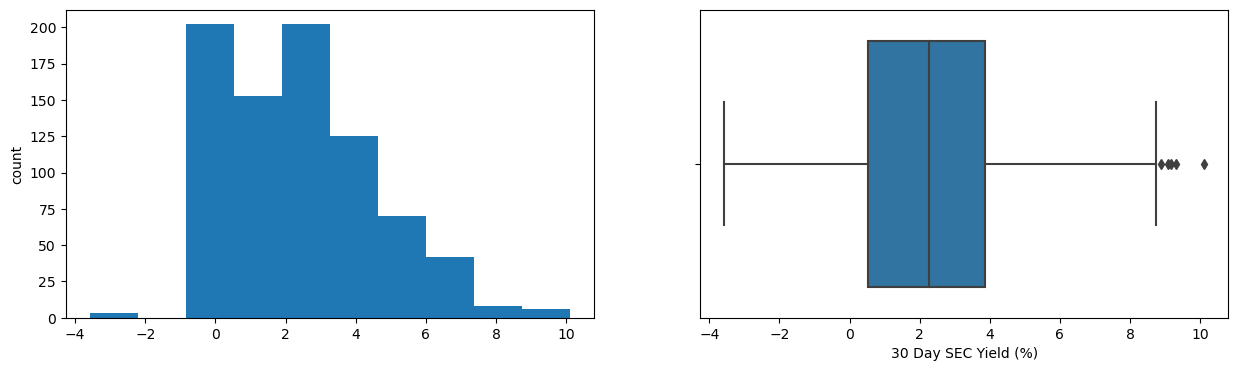

Unsubsidized Yield (%)
Skew : 0.26


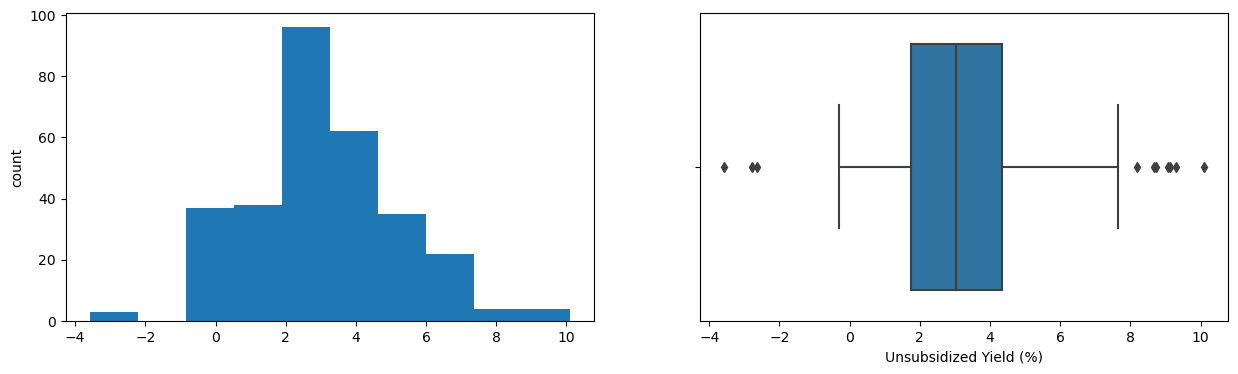

In [23]:
for col in num_cols:
    print(col)
    print('Skew :', round(data[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    data[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.show()

[Text(0, 0, 'North America'),
 Text(1, 0, 'Global'),
 Text(2, 0, 'Europe'),
 Text(3, 0, 'Asia Pacific'),
 Text(4, 0, 'Latin America'),
 Text(5, 0, 'Middle East and Africa'),
 Text(6, 0, 'Kuwait')]

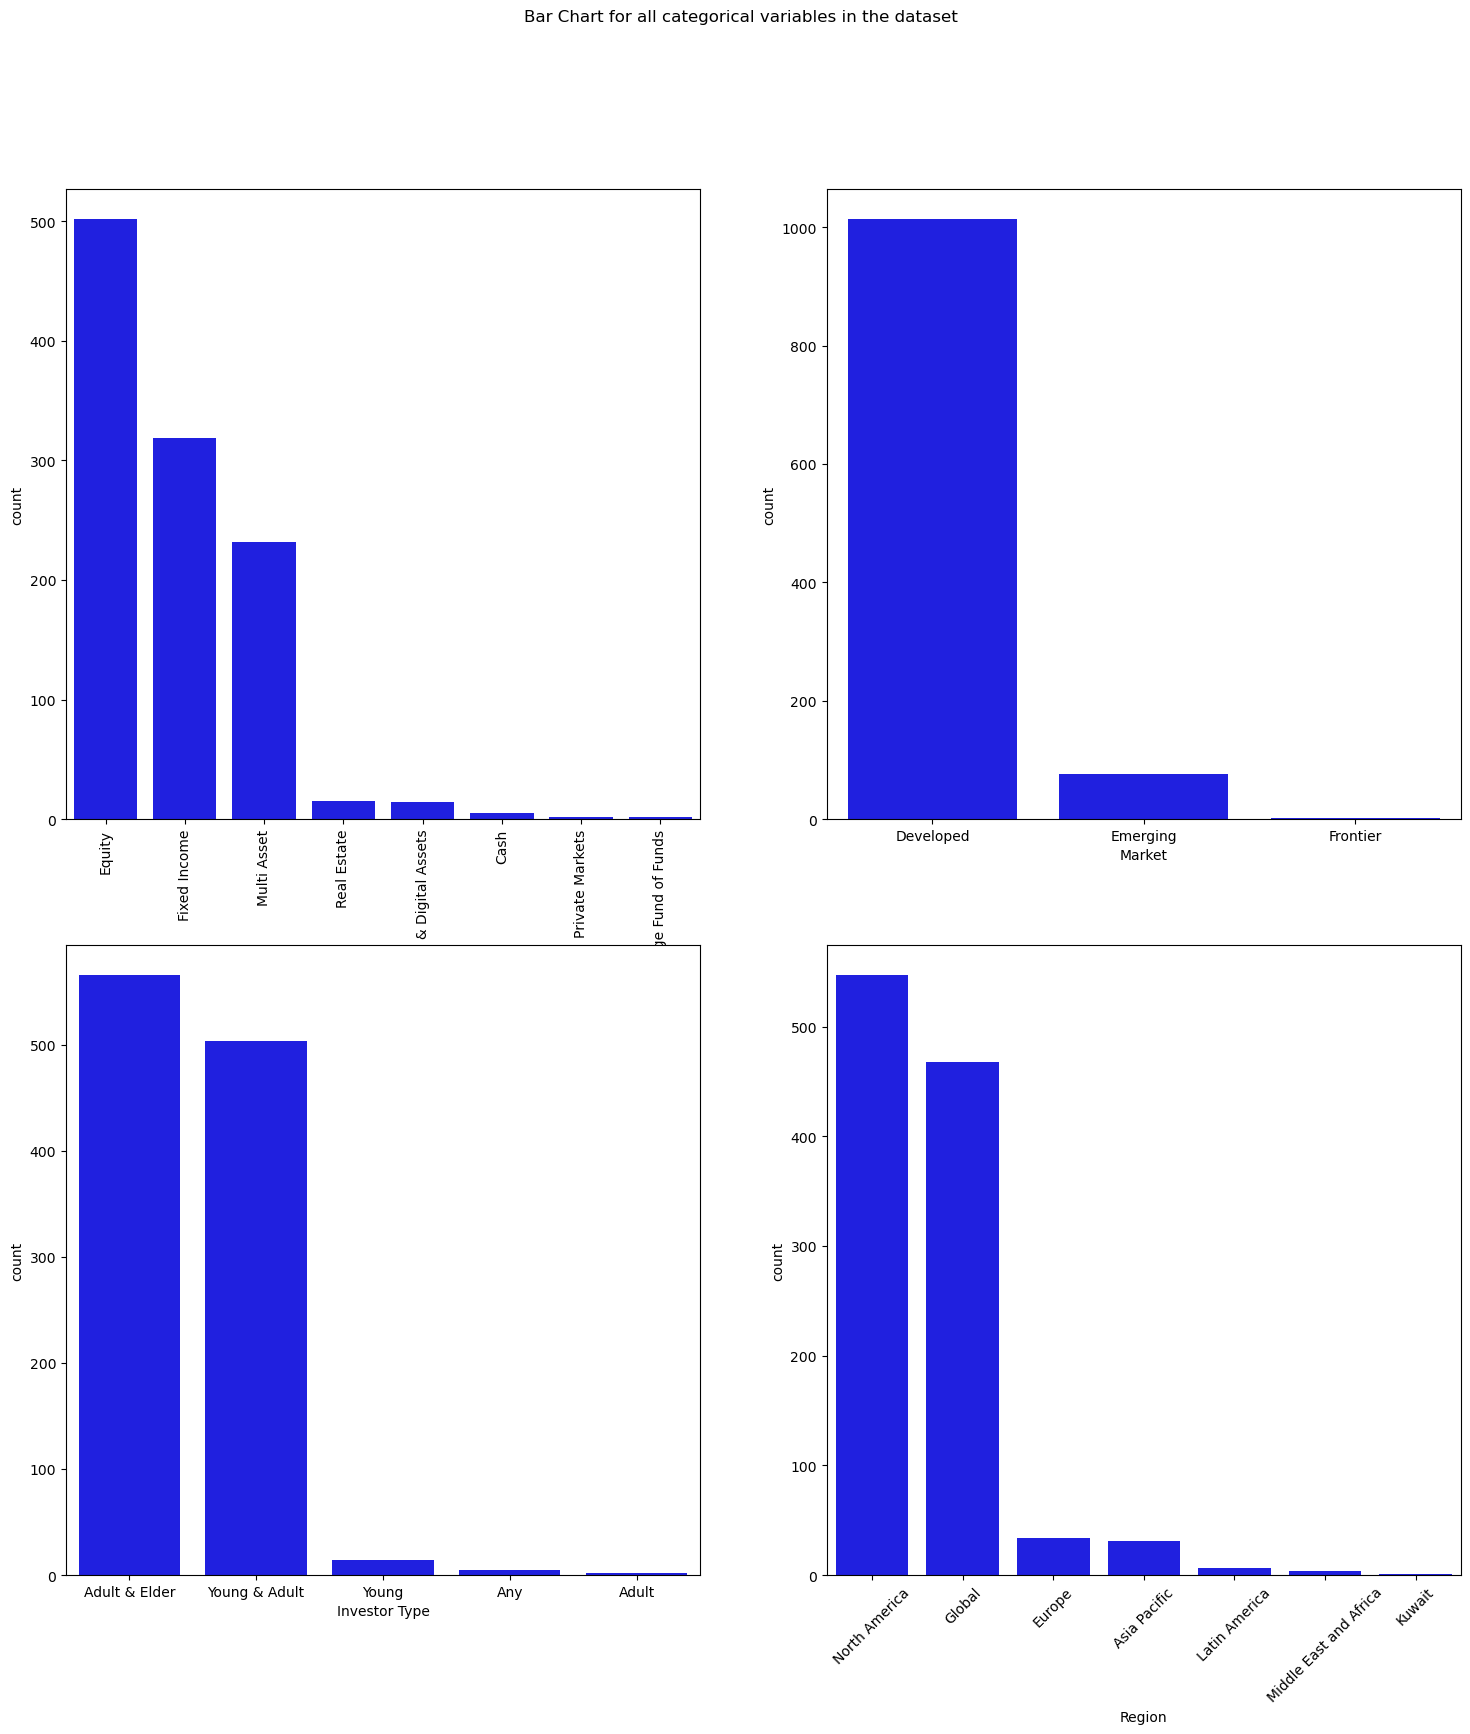

In [24]:
fig, axes = plt.subplots(2, 2, figsize = (18, 18))
fig.suptitle('Bar Chart for all categorical variables in the dataset')
chart = sns.countplot(ax = axes[0, 0], x = 'Asset Class', data = data, color = 'blue', 
              order = data['Asset Class'].value_counts().index);
sns.countplot(ax = axes[0, 1], x = 'Market', data = data, color = 'blue', 
              order = data['Market'].value_counts().index);
sns.countplot(ax = axes[1, 0], x = 'Investor Type', data = data, color = 'blue', 
              order = data['Investor Type'].value_counts().index);
chart1 = sns.countplot(ax = axes[1, 1], x = 'Region', data = data, color = 'blue', 
              order = data['Region'].value_counts().index);
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart1.set_xticklabels(chart1.get_xticklabels(), rotation=45)

In [25]:
cluster = data[['Change (%)']]
cluster.dropna(subset=['Change (%)'], inplace=True)
cluster

,Change (%)
0,-0.450450
1,-0.563063
2,-0.561798
3,-2.307080
4,0.222883
...,...
1086,-0.985944
1087,-0.985944
1088,-0.805305
1089,-0.284781


In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster)
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster['Cluster'] = kmeans.fit_predict(scaled_data)
pca = PCA(n_components=1)
pca_result = pca.fit_transform(scaled_data)
cluster['PCA1'] = pca_result

In [27]:
cluster

,Change (%),Cluster,PCA1
0,-0.450450,0,-0.475286
1,-0.563063,2,-0.303472
2,-0.561798,2,-0.305403
3,-2.307080,1,2.357383
4,0.222883,0,-1.502593
...,...,...,...
1086,-0.985944,2,0.341719
1087,-0.985944,2,0.341719
1088,-0.805305,2,0.066117
1089,-0.284781,0,-0.728049


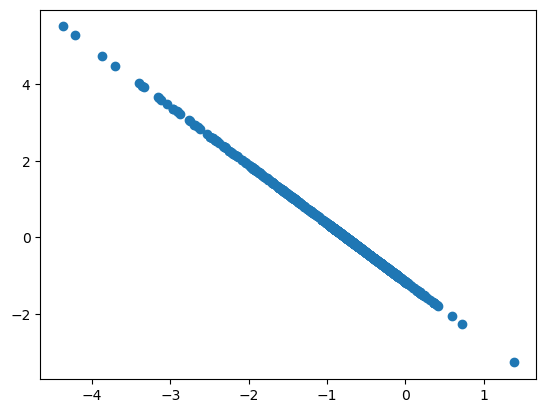

In [28]:
plt.scatter(cluster["Change (%)"], cluster["PCA1"])
plt.show()

In [31]:
cluster.to_excel(r'model.xlsx', sheet_name='cluster')

In [32]:
model = pd.read_excel('model.xlsx')
model.head()

,Unnamed: 0,Change (%),Cluster,PCA1
0,0,-0.450450,0,-0.475286
1,1,-0.563063,2,-0.303472
2,2,-0.561798,2,-0.305403
3,3,-2.307080,1,2.357383
4,4,0.222883,0,-1.502593
